In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import floating_axes
from mpl_toolkits.axisartist.grid_finder import FixedLocator, MaxNLocator


In [3]:
n = 100
rng = np.random.default_rng(100)
x = rng.uniform(0.5, 0.85, n)
y = x - rng.normal(0.05, 0.05, n)

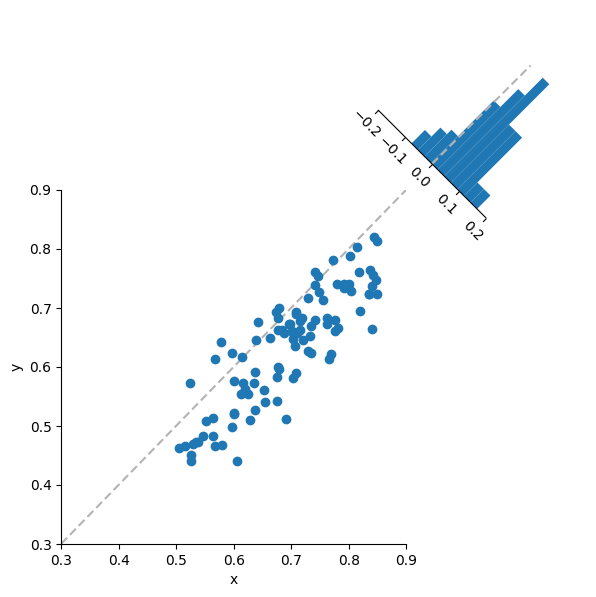

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

lim = 0.3, 0.9
ax.set(xlim = lim, ylim = lim)
ax.plot(lim, lim, c = ".7", dashes = (4, 2), zorder = 0)  # look at ax.axline?
ax.scatter(x, y)
ax.set(xlabel = "x", ylabel = "y")

fig.subplots_adjust(right = .7, top = .7)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

hist, bins = np.histogram(x - y)
w = bins[1] - bins[0]

plot_extents = -.2, .2, 0, hist.max()

transform = Affine2D().scale(60, 1).rotate_deg(-45)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents, grid_locator1=MaxNLocator(4))
inset = floating_axes.FloatingAxes(fig, [.65, .65, .35, .35], grid_helper=helper)

bar_ax = inset.get_aux_axes(transform)
bar_ax.bar(bins[:-1], hist, w)
bar_ax.plot((0, 0), (0, hist.max()), c = ".7", dashes = (4, 2))

inset.axis["left"].set_visible(False)
inset.axis["right"].set_visible(False)
inset.axis["top"].set_visible(False)

axis = inset.axis["bottom"]
axis.major_ticks.set_tick_out(True)

fig.add_axes(inset)
fig.savefig("difference_hist.png", dpi = 200)